In [2]:
# load in pandas
import pandas as pd

In [3]:
# outputs made with plotnine appear in the notebook, not in a pop-up window
%matplotlib inline

# load in plotnine
import plotnine as p9

In [4]:
lobsters_df = pd.read_csv('data/lobsters_data.csv')
lobsters_df = lobsters_df.dropna()

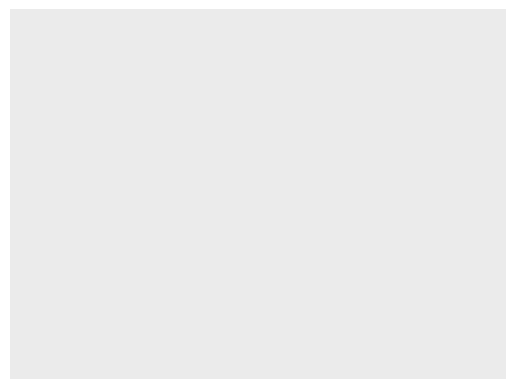

<ggplot: (128541794383)>

In [4]:
# this is a blank graph, no graphical details have been specified
(p9.ggplot(data = lobsters_df))

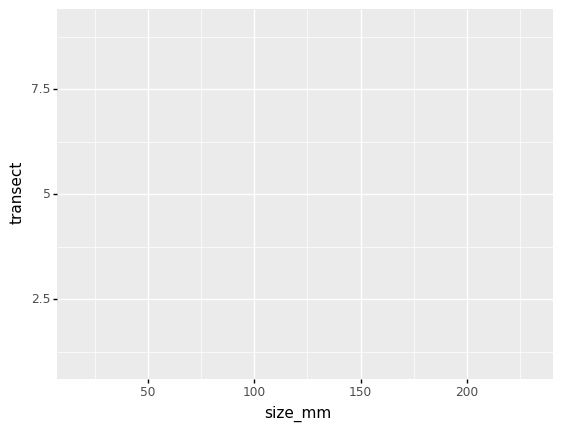

<ggplot: (128548433791)>

In [5]:
# grid of x and y axis
(p9.ggplot(data= lobsters_df, 
           mapping= p9.aes(x= 'size_mm', y= 'transect')))

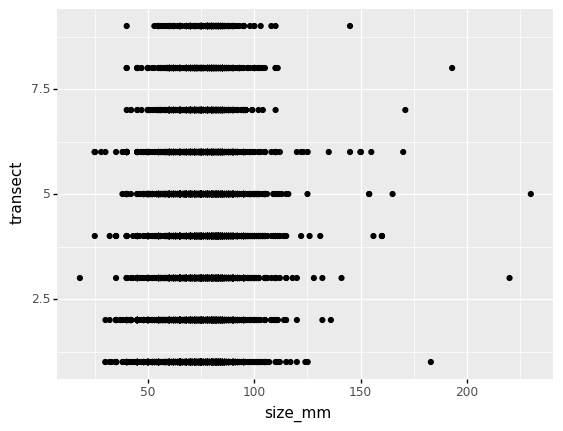

<ggplot: (128548935843)>

In [6]:
# scatter plot
# first use of the + to add on geometric objects
(p9.ggplot(data= lobsters_df, 
           mapping= p9.aes(x= 'size_mm', y= 'transect'))
 + p9.geom_point()
)

In [ ]:
# scatter plot
# adjust geometric object by specifying transparency
(p9.ggplot(data= lobsters_df, 
           mapping= p9.aes(x= 'size_mm', y= 'transect'))
 + p9.geom_point(alpha= 0.1)
)

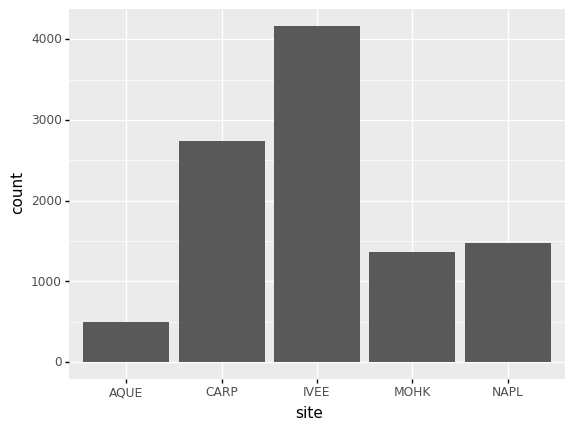

<ggplot: (128549049724)>

In [7]:
# bar plot
(p9.ggplot(data= lobsters_df,
          mapping= p9.aes(x= 'site'))
 + p9.geom_bar()
)

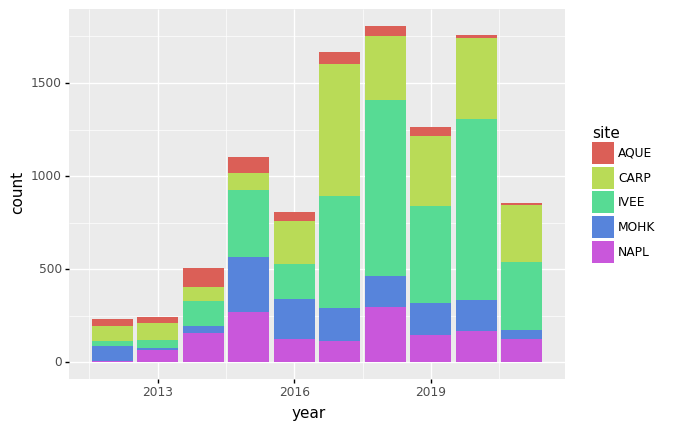

<ggplot: (128550333227)>

In [10]:
# bar plot
# add parameter in aesthetic function in order to color code by site
(p9.ggplot(data= lobsters_df,
          mapping= p9.aes(x= 'year', fill= 'site'))
 + p9.geom_bar()
)

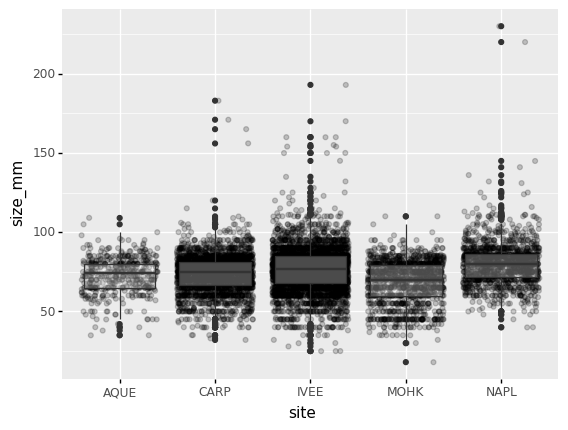

<ggplot: (128550327363)>

In [14]:
# box plot
# look at distibution of points
# add on more than one geometric objects
(p9.ggplot(data= lobsters_df, 
          mapping= p9.aes(x= 'site', y='size_mm'))
 + p9.geom_jitter(alpha= 0.2)
 + p9.geom_boxplot(alpha= 0.3)
)

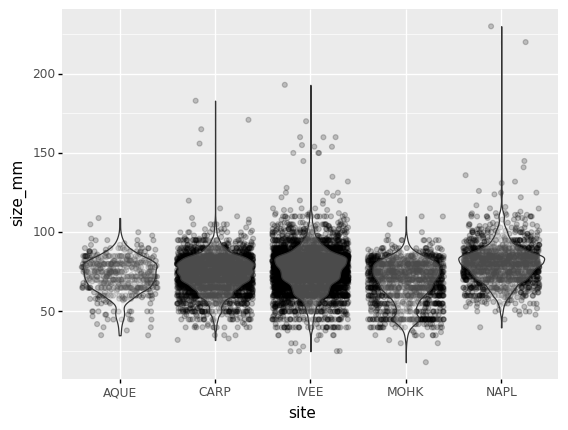

<ggplot: (128551824092)>

In [15]:
(p9.ggplot(data= lobsters_df, 
          mapping= p9.aes(x= 'site', y='size_mm'))
 + p9.geom_jitter(alpha= 0.2)
 + p9.geom_violin(alpha= 0.3) #replace boxplot
)

For looking at data over time, we will plot values over their timestamp. timestamps in plots over any interval of time or time duration- depending on your need.

For an example of a time series plot, we try to look at the counts of lobsters per year.
To do this, we will be using the count function. First we need to group the data by year and site before we can get the total count of lobsters

In [9]:
# creates the series, yearly_counts, that provides the total amount of observations at each site, each year
yearly_counts = lobsters_df.groupby(['year', 'site'])['site'].count()

# yearly counts is now a dataframe with columns year, site, and counts
yearly_counts = yearly_counts.reset_index(name='counts')
yearly_counts.head()

,year,site,counts
0,2012,AQUE,38
1,2012,CARP,78
2,2012,IVEE,26
3,2012,MOHK,83
4,2012,NAPL,6


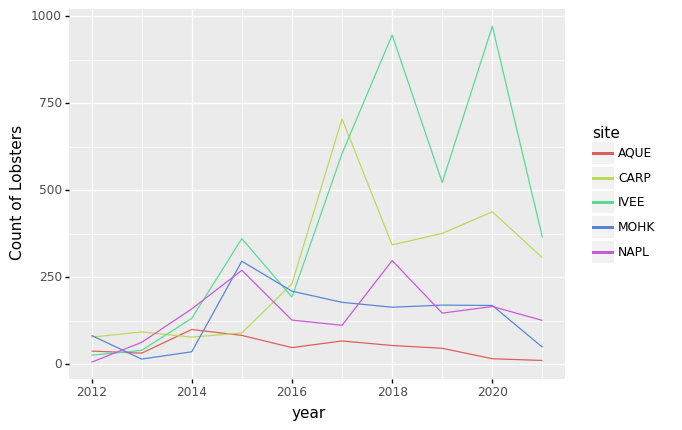

<ggplot: (158403482929)>

In [10]:
# line plot of count over the years, color coded by site
# adjust y-axis lable, can do same thing for x axis with `+ p9.xlab()`
(p9.ggplot(data=yearly_counts,
 mapping=p9.aes(x='year', y='counts', color='site')) 
 + p9.geom_line()
 + p9.ylab('Count of Lobsters')

)

Faceting: Represent multiple plots that share a common x-axis, y-axis, x- and y- axis.

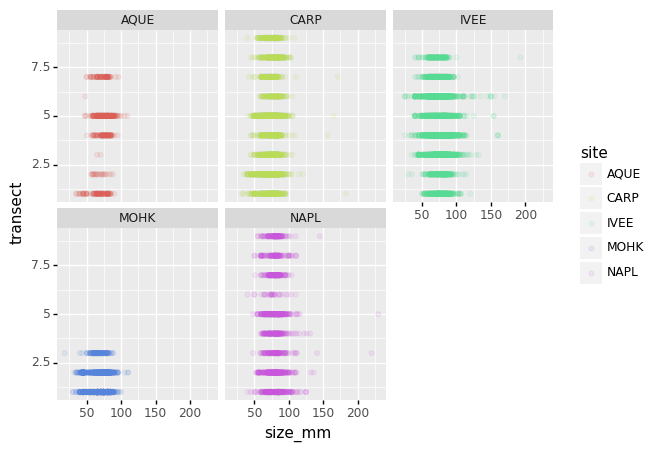

<ggplot: (158410766785)>

In [12]:
# scatter plot of size over transect, color coded by site
# seperate points by site
(p9.ggplot(data=lobsters_df, 
           mapping=p9.aes(x='size_mm', y='transect', color='site')) 
 + p9.geom_point(alpha=0.1)
 + p9.facet_wrap('site')
)

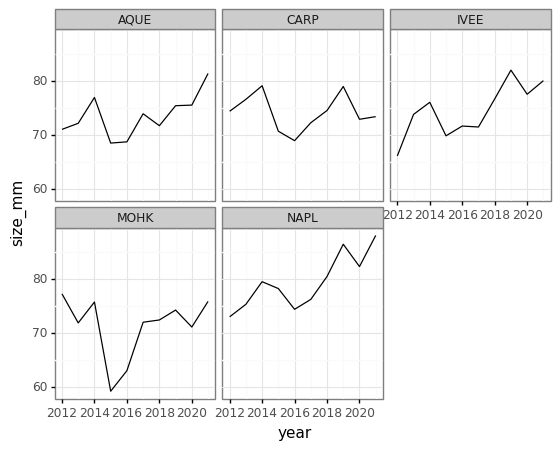

<ggplot: (158412563399)>

In [15]:
# dataframe of columns year, site, and mean size
yearly_size = lobsters_df.groupby(['year', 'site'])['size_mm'].mean().reset_index()

# multiple line plots of mean size over the years, seperate data by site
# set a theme, adjusts background of the plots
(p9.ggplot(data=yearly_size, mapping=p9.aes(x='year', y='size_mm'))
 + p9.geom_line()
 + p9.facet_wrap('site')
 + p9.theme_bw()
)